# Data-X Spring 2019: Homework 9

## Student name: Anirudh Chatty






## Student id: 3034339104

**Q1.** You have now seen how Neural networks work. You have also seen how to create and visualize neural networks using Tensorflow and Tensorboard. In this Question, you will be working on Neural networks. You will be using MNIST data (labelled images of digits) that we discussed in the class to create vanilla dense Neural network model using **tensorflow** (version 2.x is preferred, you can use 1.x as well,  **Limit the use of Keras** for solving this question) with the following characteristics:
- Input layer size of 784 (Since each image is 28 * 28)
- Three hidden layers of 300, 200 , 100
- Output layer of 10 (Since 0 - 9 digits)
- Use stochastic gradient descent
- Any other requirements can be your choice

Note that you have to define own functions for calculating loss function, optimizer to feed into the neural network.
**Plot your neural network graph (using tensorboard) and the plot of performance results (Training and Validation accuracies and loss) for every epoch**

Note: You can access MNIST data from **keras.datasets** [Link](https://keras.io/datasets/#mnist-database-of-handwritten-digits) or any standard available MNIST datasource (http://yann.lecun.com/exdb/mnist/) 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [47]:
%load_ext tensorboard.notebook

In [6]:
#!pip install -U --pre tensorflow

In [7]:
import os
cwd = os.getcwd()
cwd

'/Users/anirudhchatty/Desktop/Spring Semester/INDENG 290/HW/HW 9'

In [8]:
# Canonical way of importing TensorFlow
import tensorflow as tf

In [9]:
# Check tf version, oftentimes tensorflow is not backwards compatible
tf.__version__

'2.0.0-alpha0'

In [10]:
tf.executing_eagerly()

True

In [11]:
from datetime import datetime
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

# Make directory if it doesn't exist

from pathlib import Path
home = str(Path.home())

logdir = os.path.join(os.sep,home,logd)

if not os.path.exists(logdir):
    os.makedirs(logdir)

In [12]:
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

### Construction Phase 

In [13]:
#create model paramters with initial values 
W = tf.Variable(0.)
b = tf.Variable(0.)

In [14]:
#training info
train_steps = 300
learning_rate = 0.01

In [15]:
writer = tf.summary.create_file_writer(logdir) # create a writer
tf.summary.trace_on() # trace graph

In [16]:
tf.summary.trace_on() # trace graph


#watch the gradient flow
@tf.function  # Make it fast.
def train_on_batch(X, y):
    with tf.GradientTape() as tape:
        #forward pass 
        yhat = X * W + b

        #calcuate the loss (difference squared error)
        error = yhat - y
        loss = tf.reduce_mean(tf.square(error))

    #evalute the gradient with the respect to the paramters
    dW, db = tape.gradient(loss, [W, b])

    #update the paramters using Gradient Descent  
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db* learning_rate)

    return(loss)

W0426 11:45:51.245807 4580365760 tf_logging.py:161] Trace already enabled


In [17]:
from keras.datasets import mnist

Using TensorFlow backend.


In [18]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

In [19]:
# input information
print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)
print('Input data type:',x_train.dtype)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)
Input data type: uint8


In [20]:
print('Min-max values:',np.min(x_train),np.max(x_train))

Min-max values: 0 255


Image:


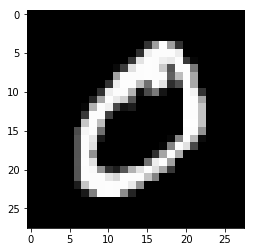

In [21]:
print('Image:')
plt.imshow(x_train[1],cmap='gray');

In [22]:
# Output information:
print('Train output shape:',y_train.shape)
print('Test output shape:',y_test.shape)
print('Data type:',y_train.dtype)

Train output shape: (60000,)
Test output shape: (10000,)
Data type: uint8


In [23]:
print('Unique labels:',np.unique(y_train))
print('First 10 outputs:')
print(y_train[:10])

Unique labels: [0 1 2 3 4 5 6 7 8 9]
First 10 outputs:
[5 0 4 1 9 2 1 3 1 4]


In [24]:
# Normalize the data, flatten inputs, and convert datatype and reshaping
x_train = x_train.reshape(60000, 784). \
                    astype('float32') / 255

x_test = x_test.reshape(10000, 784) \
                    .astype('float32') / 255

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(300, activation=tf.nn.relu, \
                    input_shape=(784,)))

# Second..
model.add(Dense(200, activation=tf.nn.relu))

# Third..
model.add(Dense(100, activation=tf.nn.relu))

model.add(Dense(10, activation='softmax'))

### Activating hidden layers

In [27]:
# Define hyperparameters and input size

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 100
n_outputs = 10

In [28]:
# Define neuron layers (ReLU in hidden layers)
# We'll take care of Softmax for output with loss function

def neuron_layer(X, n_neurons, name, activation=None):
    # X input to neuron
    # number of neurons for the layer
    # name of layer
    # pass in eventual activation function
    n_inputs = int(X.shape[1])

    # initialize weights to prevent vanishing / exploding gradients
    stddev = 2 / np.sqrt(n_inputs)
    init = tf.initializers.TruncatedNormal(stddev=stddev)

    # Initialize weights for the layer
    W = tf.Variable(init((n_inputs, n_neurons)), name="weights")
    # biases
    b = tf.Variable(tf.zeros([n_neurons]), name="bias")

    # Output from every neuron
    Z = tf.matmul(X, W) + b
    if activation is not None:
        return activation(Z)
    else:
        return Z

In [29]:
hidden1 = neuron_layer(x_train, n_hidden1, name="hidden1",
                       activation=tf.nn.relu)
hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                       activation=tf.nn.relu)
hidden3 = neuron_layer(hidden2, n_hidden3, name='hidden3', activation=tf.nn.relu)
logits = neuron_layer(hidden3, n_outputs, name="outputs")

In [30]:
learning_rate = 0.01

optimizer = tf.keras.optimizers.SGD(learning_rate)

In [31]:
xentropy = tf.keras.losses.sparse_categorical_crossentropy(y_train, logits, from_logits=True)
loss = tf.reduce_mean(xentropy, name="loss")

In [32]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [33]:
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(lr=0.001, momentum = 0.9, nesterov=True),
             metrics = ['accuracy'])

In [34]:
# train the model
NO_EPOCHS = 10
from keras.utils import to_categorical
y_binary = to_categorical(y_train)

history = model.fit(x_train, y_binary,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 2s 45us/sample - loss: 0.9215 - accuracy: 0.7550 - val_loss: 0.3637 - val_accuracy: 0.8984
Epoch 2/10
51000/51000 [==============================] - 2s 40us/sample - loss: 0.3493 - accuracy: 0.9023 - val_loss: 0.2715 - val_accuracy: 0.9226
Epoch 3/10
51000/51000 [==============================] - 2s 37us/sample - loss: 0.2814 - accuracy: 0.9203 - val_loss: 0.2292 - val_accuracy: 0.9342
Epoch 4/10
51000/51000 [==============================] - 3s 62us/sample - loss: 0.2434 - accuracy: 0.9313 - val_loss: 0.2027 - val_accuracy: 0.9424
Epoch 5/10
51000/51000 [==============================] - 2s 46us/sample - loss: 0.2144 - accuracy: 0.9384 - val_loss: 0.1815 - val_accuracy: 0.9489
Epoch 6/10
51000/51000 [==============================] - 2s 49us/sample - loss: 0.1914 - accuracy: 0.9449 - val_loss: 0.1676 - val_accuracy: 0.9518
Epoch 7/10
51000/51000 [==============================] -

In [35]:
y_binary_test = to_categorical(y_test)

test_scores = model.evaluate(x_test, y_binary_test, verbose=0)
#print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Test accuracy: 0.9597


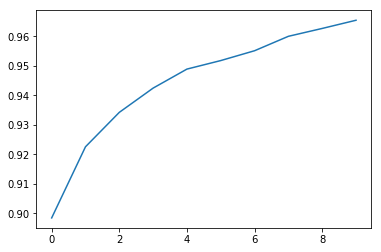

In [36]:
# plot accuracy
plt.plot(range(NO_EPOCHS),history.history['val_accuracy']);

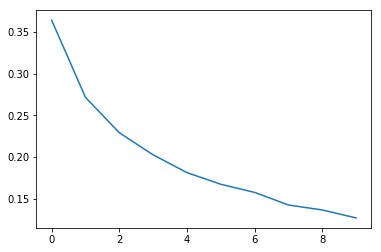

In [37]:
# plot loss
plt.plot(range(NO_EPOCHS),history.history['val_loss']);

In [39]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

In [51]:
logdir

'logs/fit/20190426-114703'

In [ ]:
!tensorboard --logdir $logdir

TensorBoard 1.14.0a20190301 at http://Anirudhs-MacBook-Pro.local:6009 (Press CTRL+C to quit)


**EXTRA CREDIT Q.** **(MANDATORY for students taking IND ENG 290)** Customize your neural networks in **Q1** to how many ever layers you want, use [batch normalization](https://www.tensorflow.org/api_docs/python/tf/layers/batch_normalization) and [Adam Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) and try different regularization techniques to combat overfitting. Also use as many iterations you want and plot every 10th iteration on the tensorboard. We will give extra credit if you achieve more than **98.5%** on the MNIST data. **Plot the neural network graph (using tensorboard) and describe the settings that you used and the performance results. Also plot performance results (Training and Validation accuracies & loss) for every epoch**

Note: You can use Keras if necessary for solving this question

If you cannot run your tensorflow notebooks locally, you can use. 
https://datahub.berkeley.edu/hub/home

In [221]:
x_train.shape

(60000, 784)

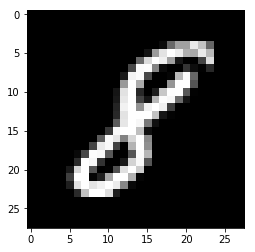

In [224]:
plt.imshow(x_train[7777], cmap='gray');

In [181]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [67]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [68]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.1989 - accuracy: 0.9421
Epoch 2/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0815 - accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0568 - accuracy: 0.9820
Epoch 4/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0427 - accuracy: 0.9868
Epoch 5/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0334 - accuracy: 0.9890
Epoch 6/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0284 - accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0234 - accuracy: 0.9920
Epoch 8/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0207 - accuracy: 0.9925
Epoch 9/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0183 - accuracy: 0.9940
Epoch 10/10
60000/6

In [69]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 94us/sample - loss: 0.0637 - accuracy: 0.9857


[0.06369881735063673, 0.9857]

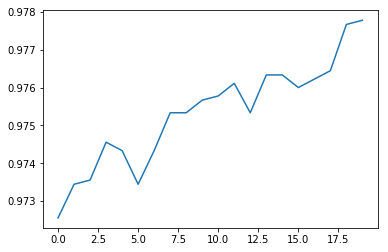

In [87]:
# plot accuracy
plt.plot(range(NO_EPOCHS),history.history['val_accuracy']);

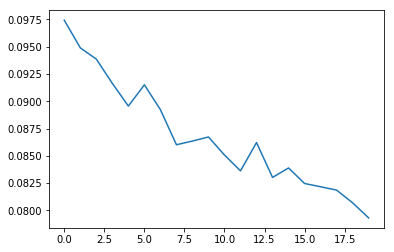

In [88]:
# plot loss
plt.plot(range(NO_EPOCHS),history.history['val_loss']);

In [80]:
writer = tf.summary.create_file_writer(logdir) # create a writer
tf.summary.trace_on() # trace graph

W0425 16:06:40.721205 4598220224 tf_logging.py:161] Trace already enabled


In [82]:
@tf.function
def func(a,b):
    with tf.name_scope('first'):
        z = tf.multiply(a,b, name='z')
    with tf.name_scope('second'):
        y1 = tf.constant(3, name='3')
        y2 = tf.constant(4)
        w1 = tf.add(z, y1, name='w1')
        w2 = tf.add(z, y2, name='w2')
        
    return(w1+w2)

In [83]:
a = tf.constant(3)
b = tf.constant(4)
func(a,b)
with writer.as_default():
    tf.summary.trace_export(
        name="func",
        step=0,
        profiler_outdir=logdir)

In [242]:
print('The optimzer used for this model was the adam optimizer and the loss function was the sparse categorical cross entropy, which is better suited for the MNIST dataset. The model still uses 10 epochs to save on sometime testing, nad the final accuracy achieved was 98.57%, which can be seen in the model.evaluate line. The number of hidden layers were kept constant at 3, and batch normalization was not explored.') 

The optimzer used for this model was the adam optimizer and the loss function was the sparse categorical cross entropy, which is better suited for the MNIST dataset. The model still uses 10 epochs to save on sometime testing, nad the final accuracy achieved was 98.57%, which can be seen in the model.evaluate line. The number of hidden layers were kept constant at 3, and batch normalization was not explored.


**Q2.** Use transfer learning and use the Imagenet VGG16 model to train on MNIST data. You can use **Keras** for solving this question. You can choose any requirements on loss function, optimizer etc. **Plot the performance results (Training and Validation accuracies & loss) for every epoch**

In [146]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16


In [127]:
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

In [128]:
print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)


In [129]:
y_binary = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

In [141]:
base_model = VGG16(weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 79s 1us/step


In [147]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(120,activation='softmax')(x) #final layer with softmax activation

In [148]:
model=Model(inputs=base_model.input,outputs=preds)


In [149]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_5
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d
20 dense_14
21 dense_15
22 dense_16
23 dense_17


In [226]:
for layer in model.layers:
    layer.trainable=False
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [236]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0217 - accuracy: 0.9936
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0169 - accuracy: 0.9949
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0152 - accuracy: 0.9953
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0152 - accuracy: 0.9956
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0155 - accuracy: 0.9952
Epoch 6/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0127 - accuracy: 0.9961
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0157 - accuracy: 0.9955
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0106 - accuracy: 0.9972
Epoch 9/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0144 - accuracy: 0.9960
Epoch 10/10
60000/60000 [============

In [237]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.1256 - accuracy: 0.9785


[0.12556580226248326, 0.9785]

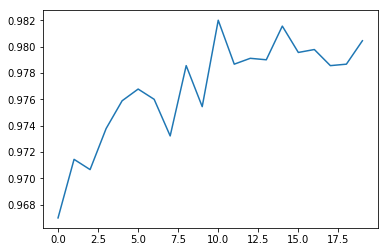

In [238]:
# plot accuracy
plt.plot(range(NO_EPOCHS),history.history['val_accuracy']);

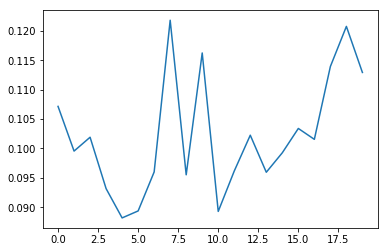

In [239]:
# plot loss
plt.plot(range(NO_EPOCHS),history.history['val_loss']);